In [1]:
%pip install pymysql
%pip install mysql-connector

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 132.3 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 1.8 MB/s eta 0:00:0000:0100:01m
  Preparing metadata (setup.py) ... done
  Created wheel for mysql-connector: filename=mysql_connector-2.2.9-cp310-cp310-linux_x86_64.whl size=247951 sha256=d235813de85520110030e8e42a3c2bd2b1d475f3c482627db68a5fbf8d81171f
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/48/9b/da67ff1a18fe8e9d428f9b1a177716d4a7d363d2bbe83bf6cf
Successfully built mysql-connector
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine

In [2]:
engine = create_engine('mysql+mysqlconnector://root:asutp@db/asutp', echo=False)

data = pd.read_sql("SELECT * FROM `Data`", engine)

data.index = data['id']

data.pop('id')

data

,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps
id,,,,,,
1,2022-05-20,35618,18964,15022,1632,NPS_1
2,2022-05-29,13275,9001,3947,327,NPS_1
3,2022-05-02,49305,33512,15785,8,NPS_1
4,2022-05-03,10553,7647,2885,21,NPS_1
5,2022-05-23,20994,11652,8548,794,NPS_1
...,...,...,...,...,...,...
504,2022-04-29,2104,1964,105,35,NPS_30
505,2022-04-30,1506,1419,83,4,NPS_30
506,2022-05-08,1247,987,170,90,NPS_41


In [3]:
data = data[data.nps == 'NPS_24']

In [4]:
# Подключение визуализации
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import pylab as pl
from matplotlib import ticker
from datetime import date

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [5]:
data

,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps
id,,,,,,
456,2022-01-05,2797,2576,216,5,NPS_24
457,2022-02-05,2839,2610,228,1,NPS_24
458,2022-03-05,3048,2812,211,25,NPS_24
459,2022-04-05,3442,3120,260,62,NPS_24


<AxesSubplot:xlabel='id'>

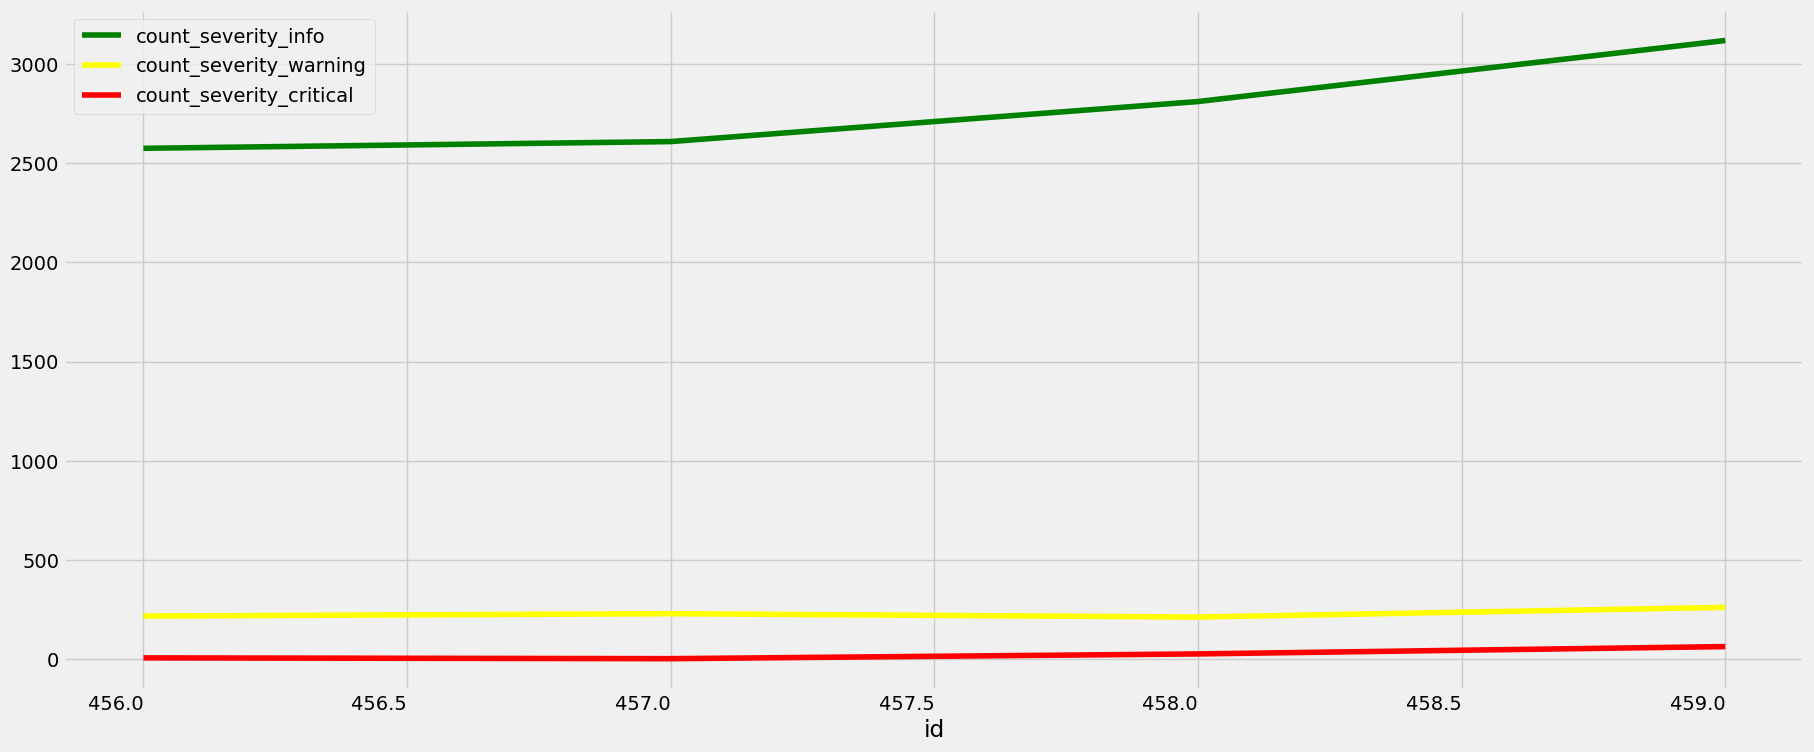

In [6]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='count_severity_info',color='green', ax=ax)
data.plot(kind='line',use_index=True, y='count_severity_warning',color='yellow', ax=ax)
data.plot(kind='line',use_index=True, y='count_severity_critical',color='red', ax=ax)

In [7]:
def ratio_count(data, severity_name):
    data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']

In [8]:
ratio_count(data, 'severity_info')
ratio_count(data, 'severity_warning')
ratio_count(data, 'severity_critical')

/tmp/ipykernel_2191/130037678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']
/tmp/ipykernel_2191/130037678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}'] = data[f'count_{severity_name}'] / data['count_total']
/tmp/ipykernel_2191/130037678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [9]:
from numpy import sqrt

# Коэффициент выравнивающий масштаб аварийных и предупредительных сообщений**
A = 2

# Функция расчёта модели показателя нештатной работоспособности станции
def state(data):
    data['state'] = sqrt((A*data['ratio_count_severity_critical'])**2 + data['ratio_count_severity_warning']**2)

In [10]:
state(data)

/tmp/ipykernel_2191/219802365.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state'] = sqrt((A*data['ratio_count_severity_critical'])**2 + data['ratio_count_severity_warning']**2)


In [13]:


data['state_normalized'] = (data['state'] - data['state'].min()) / (data['state'].max() - data['state'].min())
data

/tmp/ipykernel_2191/3572731576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_normalized'] = (data['state'] - data['state'].min()) / (data['state'].max() - data['state'].min())


,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps,ratio_count_severity_info,ratio_count_severity_warning,ratio_count_severity_critical,state,state_normalized
id,,,,,,,,,,,
456,2022-01-05,2797,2576,216,5,NPS_24,0.920987,0.077226,0.001788,0.077308,0.491447
457,2022-02-05,2839,2610,228,1,NPS_24,0.919338,0.080310,0.000352,0.080313,0.730953
458,2022-03-05,3048,2812,211,25,NPS_24,0.922572,0.069226,0.008202,0.071143,0.000000
459,2022-04-05,3442,3120,260,62,NPS_24,0.906450,0.075537,0.018013,0.083688,1.000000


<AxesSubplot:xlabel='id'>

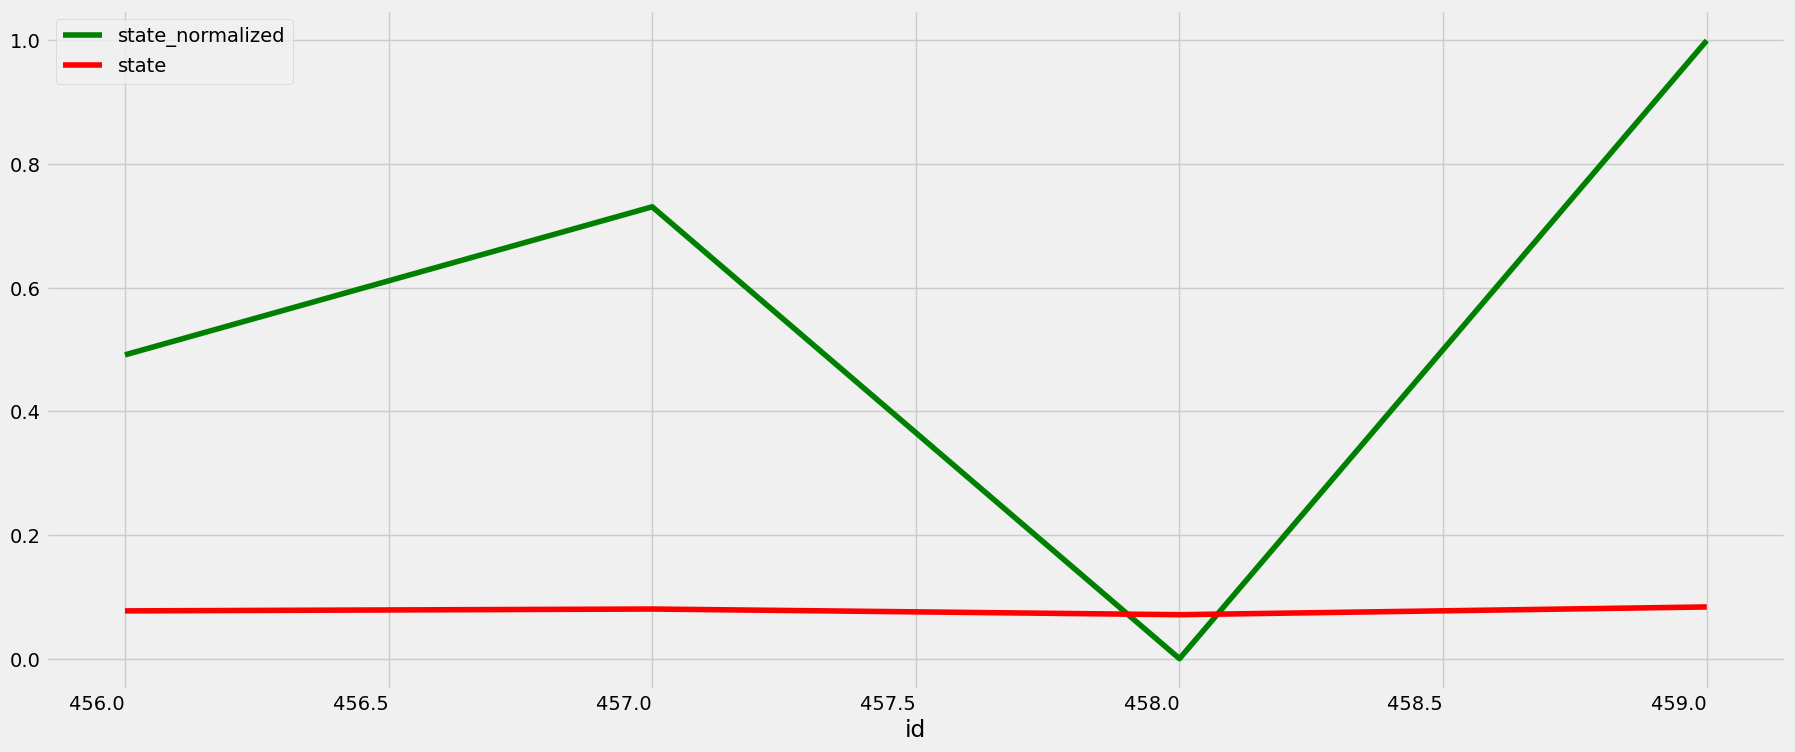

In [14]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='state_normalized',color='green', ax=ax)
data.plot(kind='line',use_index=True, y='state',color='red', ax=ax)

<AxesSubplot:xlabel='id'>

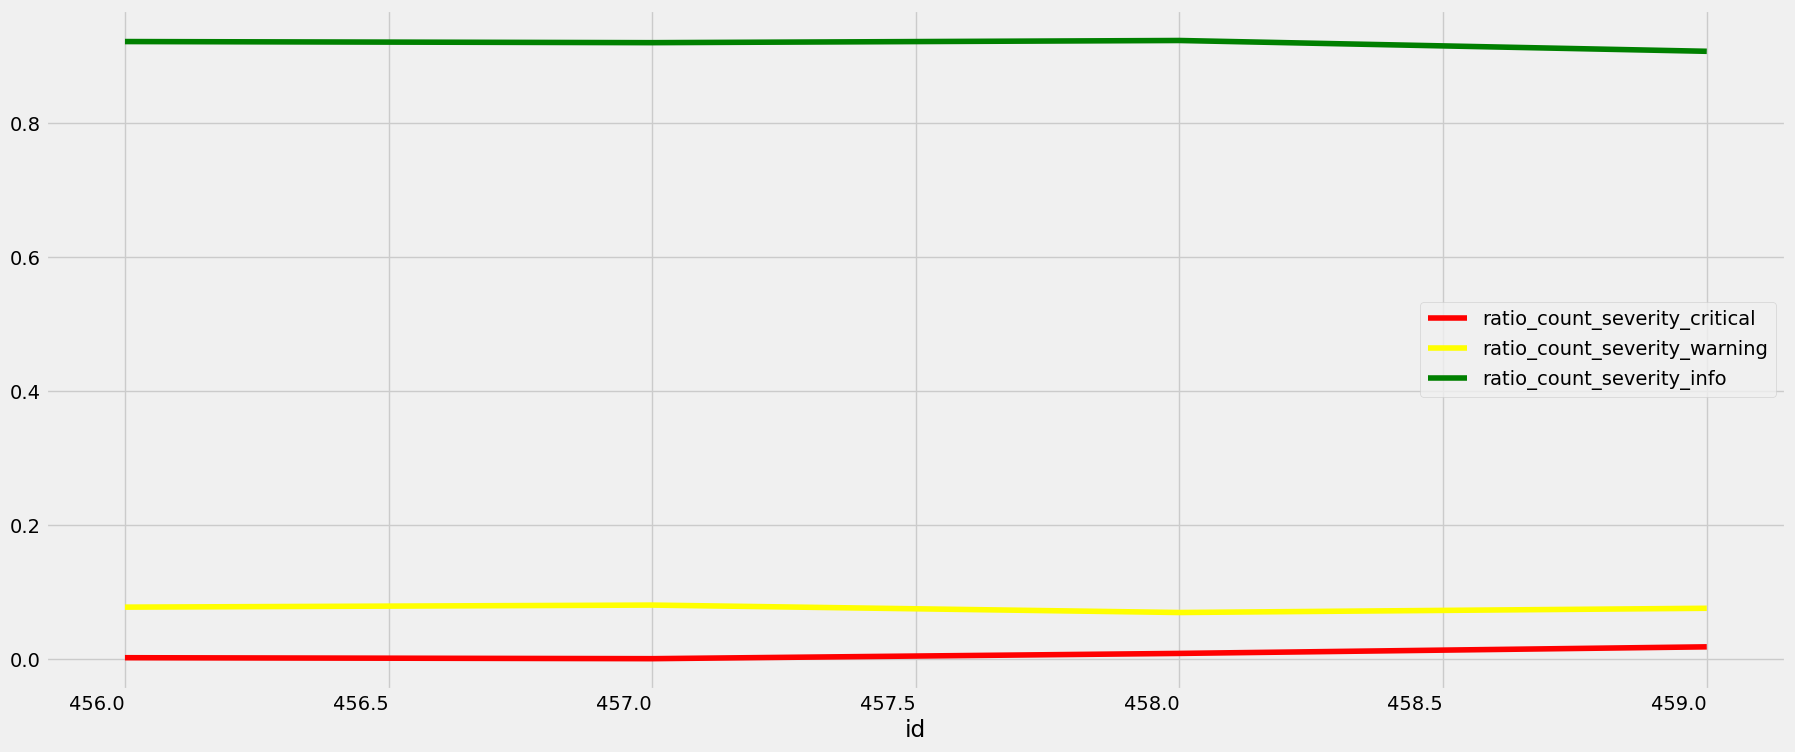

In [15]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='ratio_count_severity_critical',color='red', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_warning',color='yellow', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_info',color='green', ax=ax)

In [16]:
def ratio_normalized(data, severity_name, window):
    data[f'ratio_count_{severity_name}_normalized'] = data[f'ratio_count_{severity_name}'].rolling(min_periods=1, window=window).mean()

In [17]:
window = 5
ratio_normalized(data, 'severity_critical', window)
ratio_normalized(data, 'severity_warning', window)
ratio_normalized(data, 'severity_info', window)

data.fillna(0)

/tmp/ipykernel_2191/2633684144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}_normalized'] = data[f'ratio_count_{severity_name}'].rolling(min_periods=1, window=window).mean()
/tmp/ipykernel_2191/2633684144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'ratio_count_{severity_name}_normalized'] = data[f'ratio_count_{severity_name}'].rolling(min_periods=1, window=window).mean()
/tmp/ipykernel_2191/2633684144.py:2: SettingWithCopyWarning: 
A value is trying to

,date,count_total,count_severity_info,count_severity_warning,count_severity_critical,nps,ratio_count_severity_info,ratio_count_severity_warning,ratio_count_severity_critical,state,state_normalized,ratio_count_severity_critical_normalized,ratio_count_severity_warning_normalized,ratio_count_severity_info_normalized
id,,,,,,,,,,,,,,
456,2022-01-05,2797,2576,216,5,NPS_24,0.920987,0.077226,0.001788,0.077308,0.491447,0.001788,0.077226,0.920987
457,2022-02-05,2839,2610,228,1,NPS_24,0.919338,0.080310,0.000352,0.080313,0.730953,0.001070,0.078768,0.920162
458,2022-03-05,3048,2812,211,25,NPS_24,0.922572,0.069226,0.008202,0.071143,0.000000,0.003447,0.075587,0.920966
459,2022-04-05,3442,3120,260,62,NPS_24,0.906450,0.075537,0.018013,0.083688,1.000000,0.007089,0.075575,0.917337


<AxesSubplot:xlabel='id'>

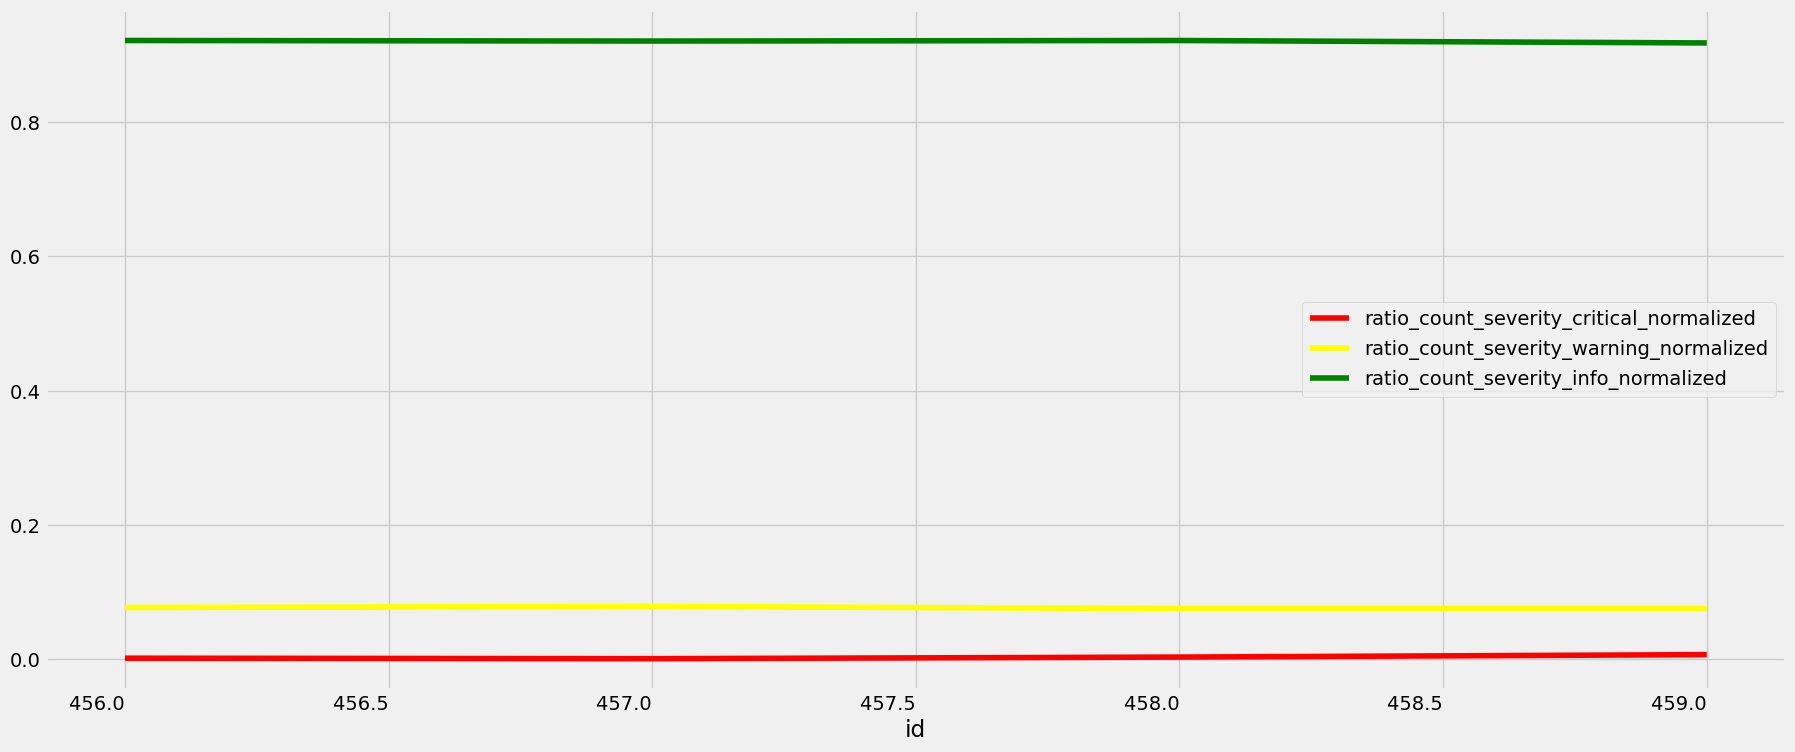

In [18]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='ratio_count_severity_critical_normalized',color='red', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_warning_normalized',color='yellow', ax=ax)
data.plot(kind='line',use_index=True, y='ratio_count_severity_info_normalized',color='green', ax=ax)

In [19]:
from numpy import sqrt

# Коэффициент выравнивающий масштаб аварийных и предупредительных сообщений**
A = 2

# Функция расчёта модели показателя нештатной работоспособности станции
def state_mean(data):
    data['state_mean'] = sqrt((A*data['ratio_count_severity_critical_normalized'])**2 + data['ratio_count_severity_warning_normalized']**2)

In [20]:
state_mean(data)

/tmp/ipykernel_2191/2946605705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_mean'] = sqrt((A*data['ratio_count_severity_critical_normalized'])**2 + data['ratio_count_severity_warning_normalized']**2)


In [21]:
data['state_mean_normalized'] = (data['state_mean'] - data['state_mean'].min()) / (data['state_mean'].max() - data['state_mean'].min())


/tmp/ipykernel_2191/2122206888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_mean_normalized'] = (data['state_mean'] - data['state_mean'].min()) / (data['state_mean'].max() - data['state_mean'].min())


<AxesSubplot:xlabel='id'>

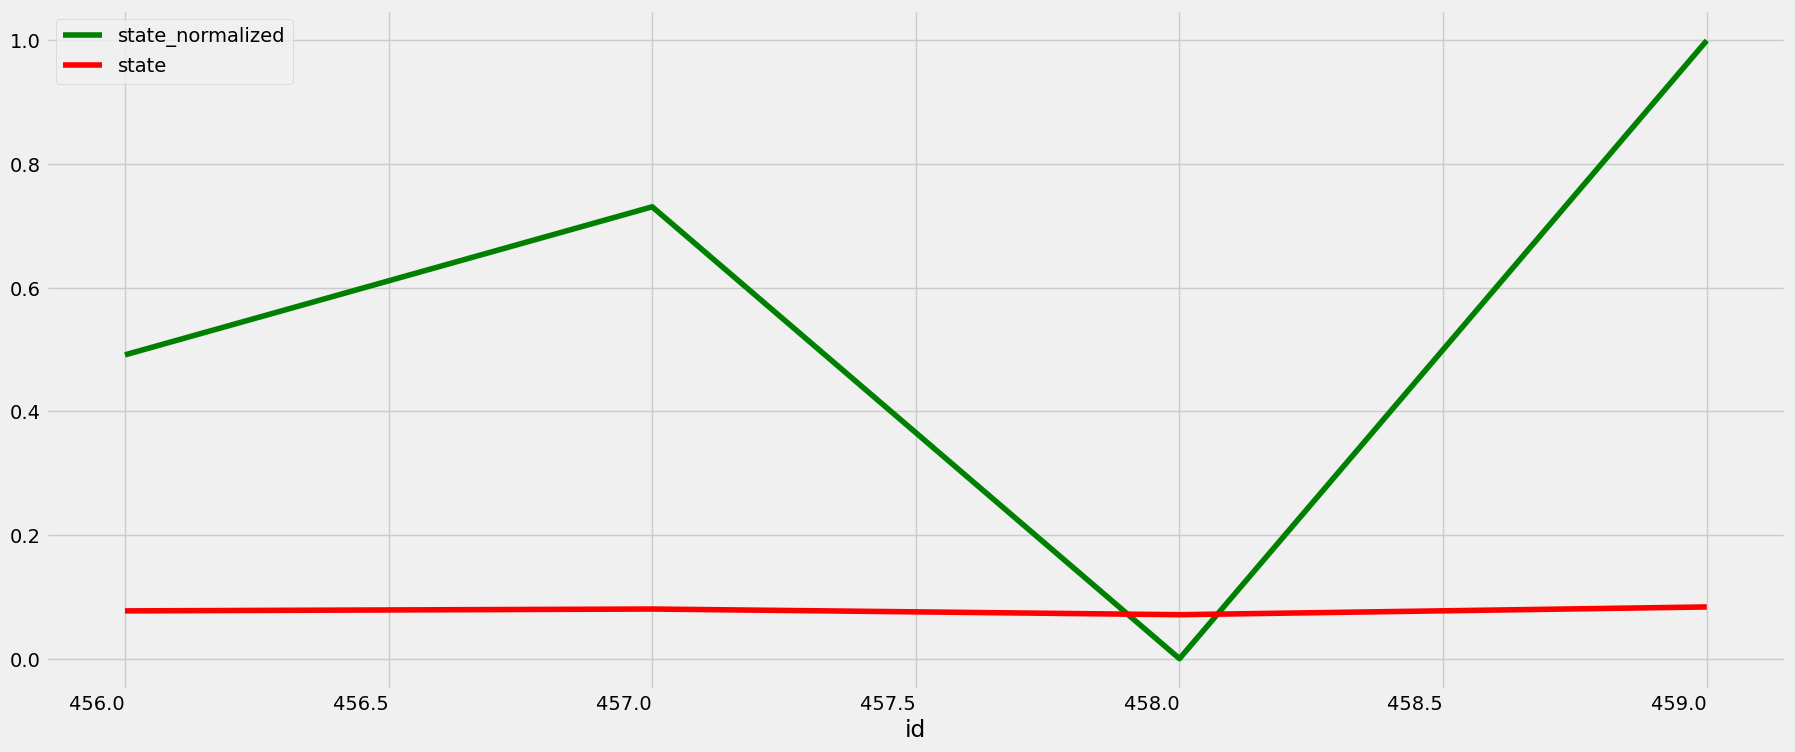

In [22]:
ax = plt.gca()
plt.gcf().autofmt_xdate()
data.plot(kind='line',use_index=True, y='state_normalized',color='green', ax=ax)
data.plot(kind='line',use_index=True, y='state',color='red', ax=ax)